<a href="https://colab.research.google.com/github/huavanson/CS114.K21/blob/master/time_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math

Lấy dữ liệu xuống bằng URL


In [43]:
data=pd.read_csv('http://cs.uit.edu.vn/data2.txt',names=['size','time'])
data.head()

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [44]:
print(data.shape)

(71115, 2)


Thêm 2 cột size^2 và size*log(size) để tránh overfit và tăng khả năng dự đoán 

In [45]:
data['size^2']=data['size']*data['size']
data['size*log(size)']=data['size']*np.log10(data['size'])
new_columns=['size','size^2','size*log(size)','time']
data=data.reindex(columns=new_columns)
data.head()


,size,size^2,size*log(size),time
0,6083695,37011344853025,4.127281e+07,0.521842
1,1954367,3819550370689,1.229493e+07,0.152648
2,3734185,13944137614225,2.454180e+07,0.298548
3,5839301,34097436168601,3.951082e+07,0.460480
4,6343427,40239066104329,4.315005e+07,0.527977


Biểu diễn dữ liệu 

(5211, 4)


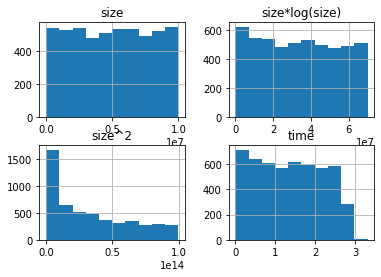

In [0]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
print(data.shape)
data.hist()
pyplot.show()

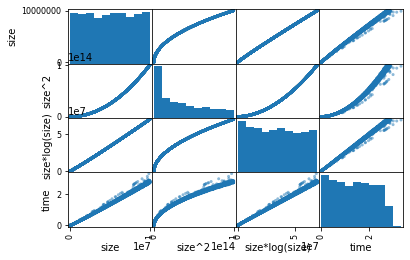

In [0]:
scatter_matrix(data)
pyplot.show()

Chia data với tỷ lệ 80-20

In [0]:
from sklearn.model_selection import train_test_split
arr=data.values
X=arr[:,0:3]
y=arr[:,3]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [46]:
pd.DataFrame(X_train).head()
#pd.DataFrame(y_train).head()

,0,1,2
0,8089718.0,6.544354e+13,5.588323e+07
1,3624350.0,1.313591e+13,2.377295e+07
2,2993021.0,8.958175e+12,1.938313e+07
3,6498836.0,4.223487e+13,4.427550e+07
4,5203034.0,2.707156e+13,3.494491e+07


Chọn model bằng cách tính mean_absolute_error . Model nào có mean_absolute_error thấp là model đó tốt . Mean_absolute_error tính bằng cách sau khi cho model fit sẽ trả về giá trị y_valid dự đoán , lấy giá trị đó so sánh với y_valid thực tế để xem sự chênh lệch

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
models = []
models.append(('LN',LinearRegression()))
models.append(('RF',RandomForestRegressor()))
models.append(('DT',DecisionTreeRegressor()))
for name, model in models:
  print('fiting and training ',name)
  model.fit(X_train,y_train)
  val_pre=model.predict(X_validation)
  cv_results=mean_absolute_error(y_validation,val_pre)
  print(cv_results)

fiting and training  LN
0.006896127387182463
fiting and training  RF
0.008454334776050768
fiting and training  DT
0.009801014055141952


LinearRegression là model tốt nhất 

In [56]:
my_model=LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Đưa 1 test tự cho vào để predict 

In [57]:
test_size=6083695
test_size2=test_size*test_size
test_size3=test_size*np.log10(test_size)
new_test_model=[[test_size,test_size2,test_size3]]
my_pre=my_model.predict(new_test_model)
print(my_pre)


[0.4951186]
